In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("DOMO.csv")

In [4]:
df.head()

,URL,Date,View ID,City,Metro,Region,Country,Latitude,Longitude,Segment - Monthly Users,...,Sessions,Session Duration,New Users,Daily Users,Platform,Station,MMG,OSBE,Joint Licensee?,Licensee type
0,https://image.pbs.org/stations/wsbe-color-cobr...,2022-08-02,89288801-1,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
1,https://image.pbs.org/stations/wsbe-color-cobr...,2022-07-07,89288801-1,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
2,https://image.pbs.org/stations/wsbe-color-cobr...,2022-08-27,89288801-1,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
3,https://image.pbs.org/stations/wsbe-color-cobr...,2022-09-29,65185712,Providence,"Providence-New Bedford,MA",Rhode Island,United States,41.8240,-71.4128,NaN,...,1.0,NaN,NaN,1.0,pbs.org,WSBE,No,No,TV only,Community
4,https://image.pbs.org/stations/wsbe-color-cobr...,2022-07-06,68900583,Portland,Portland OR,Oregon,United States,45.5152,-122.6784,NaN,...,1.0,NaN,NaN,1.0,OTT,WSBE,No,No,TV only,Community


In [5]:
df.drop(["URL","View ID"], axis=1,inplace=True)

In [6]:
df.head()

,Date,City,Metro,Region,Country,Latitude,Longitude,Segment - Monthly Users,Monthly Users,Account,...,Sessions,Session Duration,New Users,Daily Users,Platform,Station,MMG,OSBE,Joint Licensee?,Licensee type
0,2022-08-02,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,NaN,PBS Mobile Apps,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
1,2022-07-07,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,NaN,PBS Mobile Apps,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
2,2022-08-27,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,NaN,NaN,PBS Mobile Apps,...,NaN,NaN,NaN,NaN,Mobile,WSBE,No,No,TV only,Community
3,2022-09-29,Providence,"Providence-New Bedford,MA",Rhode Island,United States,41.8240,-71.4128,NaN,NaN,*www.pbs.org,...,1.0,NaN,NaN,1.0,pbs.org,WSBE,No,No,TV only,Community
4,2022-07-06,Portland,Portland OR,Oregon,United States,45.5152,-122.6784,NaN,NaN,PBS OTT Apps,...,1.0,NaN,NaN,1.0,OTT,WSBE,No,No,TV only,Community


In [7]:
df.describe()

,Latitude,Longitude,Monthly Users,Total Events,Event Value,TP Media ID,Sessions,Session Duration,New Users,Daily Users
count,1993.000000,1993.000000,214.000000,1081.000000,544.000000,1.015000e+03,705.000000,563.000000,134.000000,705.000000
mean,40.144533,-71.871210,7.649533,1.839038,1767.490809,2.940038e+09,1.710638,767.539964,1.507463,1.280851
std,7.228985,17.232477,28.793641,1.514129,1930.863402,3.148788e+08,1.887071,1540.695011,2.427122,1.440285
min,0.000000,-123.105900,1.000000,1.000000,1.000000,1.539396e+07,1.000000,1.000000,1.000000,1.000000
25%,41.450100,-71.758100,1.000000,1.000000,141.250000,3.029509e+09,1.000000,56.000000,1.000000,1.000000
50%,41.703700,-71.412800,1.000000,1.000000,1241.000000,3.062366e+09,1.000000,199.000000,1.000000,1.000000
75%,41.922000,-71.250300,3.000000,2.000000,3098.250000,3.069696e+09,2.000000,765.000000,1.000000,1.000000
max,59.329300,139.703800,295.000000,16.000000,13518.000000,3.072404e+09,31.000000,19293.000000,24.000000,30.000000


In [8]:
#There are max 2000 data per columns (some columns missing data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2000 non-null   object 
 1   City                       1993 non-null   object 
 2   Metro                      1993 non-null   object 
 3   Region                     1993 non-null   object 
 4   Country                    1993 non-null   object 
 5   Latitude                   1993 non-null   float64
 6   Longitude                  1993 non-null   float64
 7   Segment - Monthly Users    214 non-null    object 
 8   Monthly Users              214 non-null    float64
 9   Account                    2000 non-null   object 
 10  Web Property               2000 non-null   object 
 11  View (Profile)             2000 non-null   object 
 12  Device                     1786 non-null   object 
 13  Operating System           1786 non-null   objec

In [9]:
#Delete columns where more than 
df.isnull().sum()

Date                            0
City                            7
Metro                           7
Region                          7
Country                         7
Latitude                        7
Longitude                       7
Segment - Monthly Users      1786
Monthly Users                1786
Account                         0
Web Property                    0
View (Profile)                  0
Device                        214
Operating System              214
Segment - Signed In           214
Segment - Streaming User      214
Segment - LiveStream User     214
Segment - Passport User       214
Event Category                919
Event Label                   919
Event Action                  919
Total Events                  919
Event Value                  1456
Program                       919
Show Name                    1136
Video Name                    985
TP Media ID                   985
Media Manager Content ID     1136
Video Type                    985
Audiences     

In [10]:
#Drop columns where more than 50% of data are missing values (down bellow you can see the list of columns)
df.columns[df.isnull().mean()>0.5]

Index(['Segment - Monthly Users', 'Monthly Users', 'Event Value', 'Show Name',
       'Media Manager Content ID', 'Audiences', 'Originating Station',
       'Sessions', 'Session Duration', 'New Users', 'Daily Users'],
      dtype='object')

In [11]:
df.drop(df.columns[df.isnull().mean()>0.5],axis=1,inplace=True)

In [12]:
df[["MMG","OSBE","Joint Licensee?","Licensee type"]].value_counts()

MMG  OSBE  Joint Licensee?  Licensee type
No   No    TV only          Community        2000
dtype: int64

In [13]:
#Columns MMG, OSBE, Joint Licensee, Licensee type are not variables, all fields have same values so we drop these columns 
df.drop(["MMG","OSBE","Joint Licensee?","Licensee type"],axis=1,inplace=True)

In [14]:
df.isna().sum()

Date                           0
City                           7
Metro                          7
Region                         7
Country                        7
Latitude                       7
Longitude                      7
Account                        0
Web Property                   0
View (Profile)                 0
Device                       214
Operating System             214
Segment - Signed In          214
Segment - Streaming User     214
Segment - LiveStream User    214
Segment - Passport User      214
Event Category               919
Event Label                  919
Event Action                 919
Total Events                 919
Program                      919
Video Name                   985
TP Media ID                  985
Video Type                   985
Platform                       0
Station                        0
dtype: int64

In [15]:
df["Device"].unique()

array(['tablet', 'desktop', 'mobile', nan], dtype=object)

In [16]:
#Regarding that in columns Device, Operating System and Segments we have 214 values missing we do not wont to scraped them all or to just fillin them with random or most frequent value,
#we want to try to predict them based on filled values by using unsupervised algoritam Random Forest Tree Classifies

df_with_device = df[df['Device'].notna()]
print("Number of rows with device information:", df_with_device.shape[0])

df_no_device = df[df['Device'].isna()]
print("Number of rows without device information:", df_no_device.shape[0])

Number of rows with device information: 1786
Number of rows without device information: 214


In [17]:
from sklearn.model_selection import train_test_split

##from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

X = df_with_device.drop(["Device","Date"], axis=1).values
y = df_with_device["Device"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_maker.iloc[:, 1:].columns[indices])
# plt.ylim([-1, len(indices)])
plt.gca().invert_yaxis()

In [18]:
df_with_device

,Date,City,Metro,Region,Country,Latitude,Longitude,Account,Web Property,View (Profile),...,Event Category,Event Label,Event Action,Total Events,Program,Video Name,TP Media ID,Video Type,Platform,Station
0,2022-08-02,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,PBS Mobile Apps,PBS for Mobile Apps - SDK,PBS General Audience Mobile app - iOS,...,Video - MVOD iOS App,Antiques Roadshow | Special: Junk in the Trunk...,MediaStart,1.0,Antiques Roadshow,Special: Junk in the Trunk 7,3.003716e+09,full_length,Mobile,WSBE
1,2022-07-07,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,PBS Mobile Apps,PBS for Mobile Apps - SDK,PBS General Audience Mobile app - iOS,...,Video - MVOD iOS App,Finding Your Roots | Secrets & Lies | 30377192...,MediaStart,6.0,Finding Your Roots,Secrets & Lies,3.037719e+09,full_length,Mobile,WSBE
2,2022-08-27,Mercer Island,Seattle-Tacoma WA,Washington,United States,47.5707,-122.2221,PBS Mobile Apps,PBS for Mobile Apps - SDK,PBS General Audience Mobile app - iOS,...,Video - MVOD iOS App,"Antiques Roadshow | Chicago, IL, Hour 1 | 2365...",MediaStart,2.0,Antiques Roadshow,"Chicago, IL, Hour 1",2.365563e+09,full_length,Mobile,WSBE
3,2022-09-29,Providence,"Providence-New Bedford,MA",Rhode Island,United States,41.8240,-71.4128,*www.pbs.org,PBS.org - UA Pilot,01 Overall Traffic - UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbs.org,WSBE
4,2022-07-06,Portland,Portland OR,Oregon,United States,45.5152,-122.6784,PBS OTT Apps,PBS for Roku App,PBS for Roku App,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTT,WSBE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-09-11,West Greenwich,"Providence-New Bedford,MA",Rhode Island,United States,41.6286,-71.6638,PBS OTT Apps,PBS for Roku App,PBS for Roku App,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTT,WSBE
1996,2022-07-30,Millis,Boston MA-Manchester NH,Massachusetts,United States,42.1670,-71.3517,PBS Mobile Apps,PBS for Mobile Apps - SDK,PBS General Audience Mobile app - iOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,WSBE
1997,2022-09-27,Bristol,"Providence-New Bedford,MA",Rhode Island,United States,41.6771,-71.2662,PBS Mobile Apps,PBS for Mobile Apps - SDK,PBS General Audience Mobile app - Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,WSBE
1998,2022-09-27,Newport,"Providence-New Bedford,MA",Rhode Island,United States,41.4901,-71.3128,PBS OTT Apps,PBS for Apple TV App - Universal Analytics,PBS for Apple TV App - tvOS plus Legacy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTT,WSBE


In [19]:
df.isin(['Warwick']).any()

Date                         False
City                          True
Metro                        False
Region                       False
Country                      False
Latitude                     False
Longitude                    False
Account                      False
Web Property                 False
View (Profile)               False
Device                       False
Operating System             False
Segment - Signed In          False
Segment - Streaming User     False
Segment - LiveStream User    False
Segment - Passport User      False
Event Category               False
Event Label                  False
Event Action                 False
Total Events                 False
Program                      False
Video Name                   False
TP Media ID                  False
Video Type                   False
Platform                     False
Station                      False
dtype: bool

In [20]:
#Replace 214 missing values in columns Device, Operating System and Segments with most frequent
df_replaced_copy = df.copy()

replace_with = df["Device"].mode()
df_replaced_copy["Device"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Device"],drop_first=True)

replace_with = df["Operating System"].mode()
df_replaced_copy["Operating System"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Operating System"],drop_first=True)

replace_with = df["Segment - Signed In"].mode()
df_replaced_copy["Segment - Signed In"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Segment - Signed In"],drop_first=True)

replace_with = df["Segment - Streaming User"].mode()
df_replaced_copy["Segment - Streaming User"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Segment - Streaming User"],drop_first=True)

replace_with = df["Segment - LiveStream User"].mode()
df_replaced_copy["Segment - LiveStream User"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Segment - LiveStream User"],drop_first=True)

replace_with = df["Segment - Passport User"].mode()
df_replaced_copy["Segment - Passport User"].fillna(replace_with[0],inplace=True)
df_replaced_copy = pd.get_dummies(df_replaced_copy,columns=["Segment - Passport User"],drop_first=True)

df_replaced_copy.isna().sum()


Date                                0
City                                7
Metro                               7
Region                              7
Country                             7
Latitude                            7
Longitude                           7
Account                             0
Web Property                        0
View (Profile)                      0
Event Category                    919
Event Label                       919
Event Action                      919
Total Events                      919
Program                           919
Video Name                        985
TP Media ID                       985
Video Type                        985
Platform                            0
Station                             0
Device_mobile                       0
Device_tablet                       0
Operating System_Android            0
Operating System_Chrome OS          0
Operating System_Linux              0
Operating System_Macintosh          0
Operating Sy

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

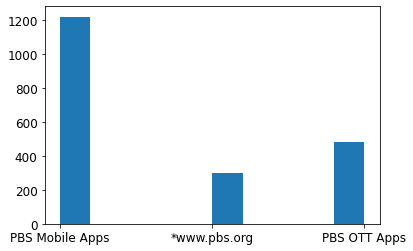

In [21]:
#Most of the users are using PBS Mobile Apps
plt.hist(df["Account"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

([<matplotlib.patches.Wedge at 0x1727e9cfe80>,
 [Text(0.046424039830598805, 1.0990199309047162, 'tablet'),
  Text(-0.6695095570564294, -0.872786888656162, 'mobile'),
  Text(0.9002650517798909, -0.6320781886315573, 'desktop')],
 [Text(0.02532220354396298, 0.5994654168571178, '48.7%'),
  Text(-0.36518703112168877, -0.4760655756306338, '31.9%'),
  Text(0.4910536646072131, -0.3447699210717585, '19.5%')])

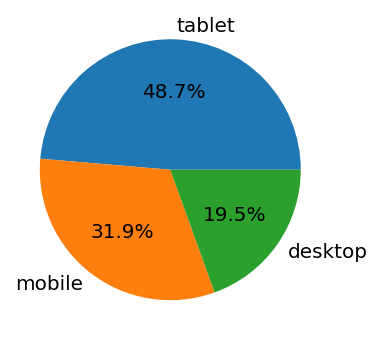

In [22]:
#Most of the users are using tablet for streaming PBS shows
plt.figure(figsize=(8, 6))
device = df["Device"].value_counts()
plt.pie(device,labels=["tablet","mobile","desktop"],autopct='%1.1f%%',textprops={'fontsize': 20})

([<matplotlib.patches.Wedge at 0x1727ea2a7c0>,
 [Text(-0.21910455784595573, 1.0779578807778754, 'iOS'),
  Text(-0.5150135349653234, -0.9719881989008518, 'Android'),
  Text(0.5688804515484567, -0.941474923641636, '(not set)'),
  Text(0.9302919540536303, -0.5869896764195079, 'Macintosh'),
  Text(1.0391359729156249, -0.3608274238367948, 'Windows'),
  Text(1.0882973397976152, -0.1600278106750014, 'Tizen'),
  Text(1.0990199254715434, -0.04642416845268847, 'Linux'),
  Text(1.099972771285571, -0.007739666035513499, 'Chrome OS')],
 [Text(-0.11951157700688493, 0.587977025878841, '56.4%'),
  Text(-0.28091647361744915, -0.5301753812186464, '21.7%'),
  Text(0.31029842811733993, -0.5135317765318014, '11.1%'),
  Text(0.5074319749383437, -0.32017618713791335, '3.7%'),
  Text(0.5668014397721589, -0.1968149584564335, '3.6%'),
  Text(0.5936167307986991, -0.08728789673181894, '2.4%'),
  Text(0.599465413893569, -0.025322273701466436, '0.9%'),
  Text(0.5999851479739478, -0.004221636019370999, '0.2%')])

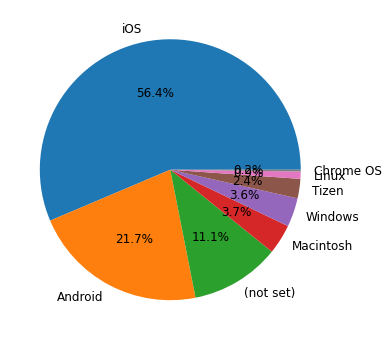

In [23]:
#iOS is dominant operative system used in PBS shows streaming
plt.figure(figsize=(8, 6))
device = df["Operating System"].value_counts()
plt.pie(device,labels=["iOS","Android","(not set)","Macintosh","Windows","Tizen","Linux","Chrome OS"],autopct='%1.1f%%',textprops={'fontsize': 12})

In [24]:
#Creating function to get Most Ussed Accounts in Each Country
states = ['United States', 'United Kingdom', 'Guam', 'Germany',
       'Netherlands', 'Canada', 'Japan', 'Mexico', 'Sweden', 'Belgium',
       'India', 'Romania']
def condition_for_geo(df):
    dic = {}
    for i in states: 
        account_per_country = df[df["Country"] == i]["Account"].sort_values(ascending=False).value_counts()
        account_per_country = account_per_country.to_dict()
        l = list(account_per_country.keys())[0]
        dic[i] = str(l)
    return dic
dic = condition_for_geo(df)  

In [25]:
dic

{'United States': 'PBS Mobile Apps',
 'United Kingdom': '*www.pbs.org',
 'Guam': 'PBS OTT Apps',
 'Germany': '*www.pbs.org',
 'Netherlands': '*www.pbs.org',
 'Canada': 'PBS Mobile Apps',
 'Japan': '*www.pbs.org',
 'Mexico': '*www.pbs.org',
 'Sweden': 'PBS Mobile Apps',
 'Belgium': '*www.pbs.org',
 'India': '*www.pbs.org',
 'Romania': '*www.pbs.org'}

In [26]:
#Most Ussed Accounts in Each Country
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'country names',        
        'locations':['United States', 'United Kingdom', 'Guam', 'Germany', 'Netherlands', 'Canada', 'Japan', 'Mexico', 'Sweden', 'Belgium', 'India', 'Romania'],
        'colorscale':'Portland',
        'text':['PBS Mobile Apps', '*www.pbs.org', 'PBS OTT Apps', '*www.pbs.org', '*www.pbs.org', 'PBS Mobile Apps', '*www.pbs.org', '*www.pbs.org', 'PBS Mobile Apps', '*www.pbs.org', '*www.pbs.org', '*www.pbs.org'],
        'z':[3,2,1,2,2,3,2,2,3,2,2,2],                  
        'colorbar':{'title':'PBS Accounts'},
    },     
    layout = {
      'geo':{
          'scope':'world'
      }  
    })
choropleth_map

In [27]:
df1 = df[df['Device'].notna()]

In [28]:
states_for_device = ['United States', 'United Kingdom', 'Guam', 'Netherlands', 'Canada',
       'Mexico', 'Sweden', 'Romania']

In [29]:
#Creating function to get Most Ussed Accounts in Each Country
def condition_for_geo_device(df1):
    dic = {}
    for i in states_for_device: 
        account_per_country = df1[df1["Country"] == i]["Device"].sort_values(ascending=False).value_counts()
        account_per_country = account_per_country.to_dict()
        k = list(account_per_country.keys())[0]
        dic[i] = str(k)
    return dic
dic = condition_for_geo_device(df1) 

In [30]:
#Creating function to get Most Ussed Device in Each Country
def condition_for_geo_device(df1):
    dic = {}
    for i in states_for_device: 
        account_per_country = df1[df1["Country"] == i]["Device"].sort_values(ascending=False).value_counts()
        account_per_country = account_per_country.to_dict()
        k = list(account_per_country.keys())[0]
        dic[i] = str(k)
    return dic
dic = condition_for_geo_device(df1) 


#Most Ussed Device in Each Country
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'country names',        
        'locations':['United States', 'United Kingdom', 'Guam', 'Netherlands', 'Canada', 'Mexico', 'Sweden', 'Romania'],
        'colorscale':'Portland',
        'text':['tablet', 'desktop', 'mobile', 'mobile', 'tablet', 'desktop', 'mobile', 'desktop'],
        'z':[1,2,3,3,1,2,3,2],                  
        'colorbar':{'title':'PBS Device'},
    },     
    layout = {
      'geo':{
          'scope':'world'
      }  
    })
choropleth_map

In [31]:
#Creating function to get Most Ussed Operating System in Each Country
def condition_for_geo_device(df1):
    dic = {}
    for i in states_for_device: 
        account_per_country = df1[df1["Country"] == i]["Operating System"].sort_values(ascending=False).value_counts()
        account_per_country = account_per_country.to_dict()
        k = list(account_per_country.keys())[0]
        dic[i] = str(k)
    return dic
dic = condition_for_geo_device(df1) 

#Most Ussed Operating System in Each Country
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'country names',        
        'locations':['United States', 'United Kingdom', 'Guam', 'Netherlands', 'Canada', 'Mexico', 'Sweden', 'Romania'],
        'colorscale':'Portland',
        'text':['iOS', 'Macintosh', 'Android', 'Android', 'iOS', 'Macintosh', 'iOS', 'Windows'],
        'z':[1,2,3,3,1,2,1,4],                  
        'colorbar':{'title':'PBS OS'},
    },     
    layout = {
      'geo':{
          'scope':'world'
      }  
    })
choropleth_map


<AxesSubplot:>

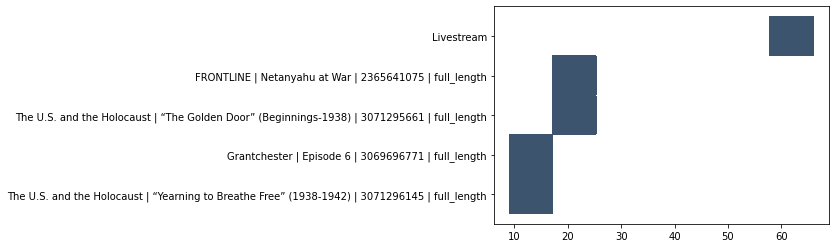

In [32]:
#Most viewed event is Livestream (66 views) then FROBTLINE and Holocaust(20) and the rest
top_5_watched_events = df_replaced_copy["Event Label"].sort_values(ascending=False).value_counts()[:5]
top_5_dict = top_5_watched_events.to_dict()
sns.histplot(data=top_5_dict,x=top_5_dict.values(),y=top_5_dict.keys())


([<matplotlib.patches.Wedge at 0x1727fb6a670>,
 [Text(-1.0180854531882837, 0.4165357247660844, 'Full_length'),
  Text(0.9289468647550282, -0.5891160517774096, 'Clip'),
  Text(1.0828501716602064, -0.19348257217501957, 'Preview')],
 [Text(-0.5553193381027002, 0.2272013044178642, '87.6%'),
  Text(0.506698289866379, -0.32133602824222335, '6.7%'),
  Text(0.5906455481782943, -0.10553594845910157, '5.6%')])

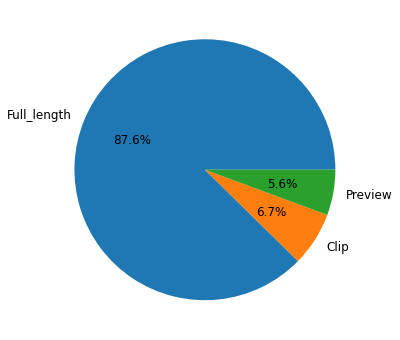

In [33]:
#Most of watched videos are full lentgh types. Less than 10% are Clips and Previews
video_types = df_replaced_copy["Video Type"].sort_values().value_counts()[:3]
plt.figure(figsize=(8, 6))
device = df["Operating System"].value_counts()
plt.pie(video_types,labels=["Full_length","Clip","Preview"],autopct='%1.1f%%',textprops={'fontsize': 12})

<AxesSubplot:>

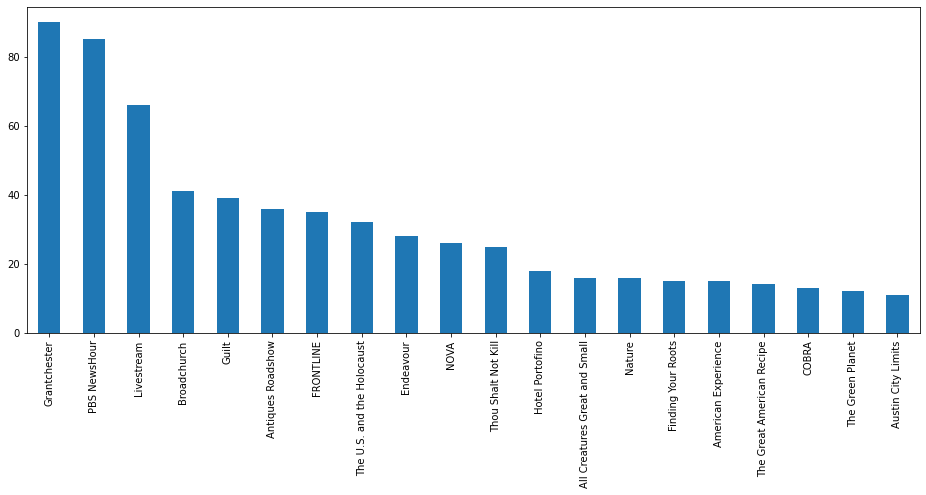

In [34]:
#Top 20 most watched programs
plt.figure(figsize=(16,6))
most_watched_programs = df_replaced_copy["Program"].sort_values().value_counts()[:20]
most_watched_programs.plot(kind="bar")

In [35]:
df_replaced_copy["Segment - Passport User_True"].value_counts()

1    1115
0     885
Name: Segment - Passport User_True, dtype: int64

devices = ['tablet', 'desktop', 'mobile']
segments = ["Segment - LiveStream User","Segment - Streaming User","Segment - Passport User"]
def passport_streams(df):
    dic = {}
    k_list = []
    v_list = []
    for i in devices:
            for y in segments:   
                segment_passport = df[df["Device"] == i][y].value_counts()
                segment_passport = segment_passport.to_dict()
                k = list(segment_passport.keys())
                k = tuple(k)
                v = list(segment_passport.values())
                k_list.append(tuple(k))
                v_list.append(v)
                print(v_list)
    return k_list, v_list
            
k_list,v_list = passport_streams(df)
